In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.stats import zscore
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Santander/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Santander/test.csv')

##1.1. Exploring the dataset

In [ ]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


All the variables seem to be transformed. Visually, it is also observed that all variables are normally distributed. 

In [ ]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


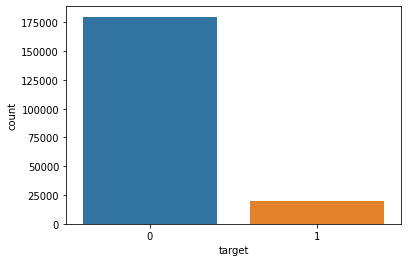

In [ ]:
sns.countplot(x='target',data=train)

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(train)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


##1.2. Variable reduction - IV and WOE

The following is a function that calculates IV and WOE for the variables in the dataset.

In [15]:
def iv_woe(data, target, bins=20, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [16]:
iv, woe_iv = iv_woe(train, "target")

In [17]:
iv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  201 non-null    object 
 1   IV        201 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [ ]:
iv.head()

,Variable,IV
0,ID_code,7.932511
0,var_0,0.041014
0,var_1,0.036869
0,var_2,0.046342
0,var_3,0.003112


The index value is 0 for all rows. This may cause a problem while filtering the dataset. So, let's reset the index.

In [18]:
iv.reset_index(drop = True,inplace=True)
iv.head()

,Variable,IV
0,ID_code,7.932511
1,var_0,0.041014
2,var_1,0.036869
3,var_2,0.046342
4,var_3,0.003112


ID_code is not a variable and hence, calculating IV for it does not make sense. 

In [19]:
iv.drop(iv.index[(iv["Variable"] == "ID_code")],axis=0,inplace=True)
iv.head()

,Variable,IV
1,var_0,0.041014
2,var_1,0.036869
3,var_2,0.046342
4,var_3,0.003112
5,var_4,0.003768


The objective is to select variables that differenciate well  and remove variables that have low predictive power. A universally accepted cut-off for IV is 0.02. Hence, variables that have IV less than 0.02 are dropped. 

In [20]:
iv_subset1 = iv[iv['IV'] >= 0.02]
iv_subset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 1 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  65 non-null     object 
 1   IV        65 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


The number of variables has been reduced to 65 from the original 200. 

##1.3. Dimension reduction using PCA

In [ ]:
train_pca = train.drop(labels=['ID_code','target'],axis=1)

In [ ]:
data_scaled=train_pca.apply(zscore)

In [ ]:
pca = PCA()
data_reduced = pca.fit_transform(data_scaled)
data_reduced.transpose()

array([[-0.44440823,  2.21068356, -0.06566252, ...,  0.70239573,
        -0.46526055, -1.42638674],
       [ 0.13216404, -0.2963106 , -0.11441835, ..., -0.7946781 ,
         0.35302903, -1.10792322],
       [-0.37563526,  0.23734188, -2.04049932, ..., -0.53434388,
         0.16033316, -1.46471143],
       ...,
       [ 0.56104614, -1.50302442,  1.18187724, ...,  1.01270036,
        -0.40768865, -0.83369791],
       [-0.01978502, -0.9366948 , -0.16931748, ...,  0.29456056,
         1.2731306 ,  0.50058195],
       [ 0.86693817, -1.54811449,  0.09908479, ...,  0.76218515,
         1.70288349, -0.7989944 ]])

In [ ]:
print('Eigen Vectors \n')
pd.DataFrame(pca.components_)

Eigen Vectors 



,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.113597,0.104157,0.121453,0.015592,0.007613,0.044729,0.131468,-0.017531,0.050159,-0.098026,...,0.106239,0.094753,-0.084270,-0.027630,-0.054150,0.062293,0.064609,-0.057318,-0.109421,0.073956
1,0.043750,0.008162,0.010329,0.150598,0.011088,-0.099539,-0.041088,0.071406,0.116530,0.117512,...,0.151918,0.040089,-0.000391,-0.002391,0.027619,-0.012039,-0.013601,0.064382,0.054960,-0.102778
2,0.084980,0.035149,0.007964,0.020716,0.118882,-0.010152,0.029953,0.107580,0.008252,-0.008949,...,0.002598,0.029451,0.025540,-0.067520,-0.009419,0.091136,-0.030770,-0.093278,0.083264,-0.060287
3,0.082712,0.044227,0.060638,-0.011923,0.135716,-0.051260,0.023457,0.031148,-0.013359,0.057264,...,-0.021604,0.027384,-0.001440,0.061188,0.007212,0.156800,-0.067908,0.069285,0.024009,0.114751
4,0.050322,-0.065474,-0.001771,0.082787,0.040367,-0.061982,-0.068438,0.092750,0.126300,-0.037101,...,-0.000374,-0.130377,0.078717,0.064460,0.021265,-0.088652,-0.059332,-0.041356,-0.051213,0.029370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.054565,0.067274,-0.125965,-0.030866,-0.032427,0.149264,-0.077228,-0.057014,0.040476,0.038869,...,-0.091735,0.011936,0.110477,0.048311,0.078135,0.057889,0.053578,0.019872,-0.004723,0.023444
196,0.110368,0.060023,0.098094,-0.059940,-0.048013,-0.011002,-0.011874,-0.048637,-0.018413,-0.084940,...,-0.095127,-0.062443,0.067931,-0.198188,0.011253,0.024506,-0.015011,0.082981,-0.039757,-0.058684
197,-0.109268,-0.101245,0.066551,-0.059768,-0.126740,-0.112516,0.072070,0.051541,0.064742,0.012418,...,-0.073925,0.165777,0.150092,-0.035749,-0.028681,0.069208,-0.000424,-0.025518,-0.022458,0.024295
198,-0.019509,-0.040284,-0.074005,0.002635,0.038158,-0.100263,-0.089556,-0.009310,-0.042282,-0.057581,...,0.066581,-0.041867,-0.100473,-0.003806,0.048199,-0.155181,0.193190,0.045173,-0.023558,0.025809


In [ ]:
print('Eigen Values \n')
pca.explained_variance_

Eigen Values 



array([1.22262234, 1.06053954, 1.05972959, 1.05935073, 1.0575937 ,
       1.05654297, 1.0559005 , 1.05485824, 1.05313637, 1.05257194,
       1.05111478, 1.04999324, 1.04921006, 1.04737953, 1.04716789,
       1.04701259, 1.04545951, 1.04476914, 1.04385827, 1.04365811,
       1.04299901, 1.04204096, 1.0414636 , 1.04048843, 1.03995595,
       1.03890486, 1.03860306, 1.03851713, 1.03749788, 1.03670249,
       1.03658377, 1.03566556, 1.03479383, 1.03384782, 1.03326951,
       1.03319983, 1.03248886, 1.03195852, 1.0309419 , 1.03067649,
       1.02990242, 1.02900016, 1.02852291, 1.02822644, 1.0274121 ,
       1.02689753, 1.02637062, 1.02581013, 1.02557472, 1.02503239,
       1.02381844, 1.02355427, 1.0232799 , 1.02301112, 1.02188709,
       1.02126759, 1.0211813 , 1.02063701, 1.02026613, 1.01965   ,
       1.01907104, 1.01854184, 1.0182283 , 1.0176045 , 1.0167947 ,
       1.01610475, 1.01584493, 1.01516059, 1.01441063, 1.01378303,
       1.01358793, 1.01269186, 1.01245016, 1.01183589, 1.01128

In [ ]:
print('The variance explained by each of eigen values in order is  \n')
pca.explained_variance_ratio_*100

The variance explained by each of eigen values in order is  



array([0.61130811, 0.53026712, 0.52986214, 0.52967272, 0.52879421,
       0.52826884, 0.52794761, 0.52742648, 0.52656555, 0.52628334,
       0.52555476, 0.52499399, 0.52460241, 0.52368715, 0.52358133,
       0.52350368, 0.52272714, 0.52238196, 0.52192652, 0.52182644,
       0.5214969 , 0.52101787, 0.52072919, 0.52024161, 0.51997538,
       0.51944983, 0.51929893, 0.51925597, 0.51874634, 0.51834866,
       0.51828929, 0.51783019, 0.51739433, 0.51692133, 0.51663217,
       0.51659733, 0.51624185, 0.51597668, 0.51546837, 0.51533567,
       0.51494864, 0.51449751, 0.51425888, 0.51411065, 0.51370348,
       0.5134462 , 0.51318274, 0.5129025 , 0.51278479, 0.51251363,
       0.51190666, 0.51177458, 0.51163739, 0.511503  , 0.51094099,
       0.51063124, 0.5105881 , 0.51031596, 0.51013051, 0.50982245,
       0.50953297, 0.50926838, 0.50911161, 0.50879971, 0.50839481,
       0.50804983, 0.50791993, 0.50757776, 0.50720278, 0.50688898,
       0.50679143, 0.5063434 , 0.50622255, 0.50591542, 0.50563

In [ ]:
print("Cumulative Variance Explained /n")
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

Cumulative Variance Explained /n


array([  0.6,   1.1,   1.6,   2.1,   2.6,   3.1,   3.6,   4.1,   4.6,
         5.1,   5.6,   6.1,   6.6,   7.1,   7.6,   8.1,   8.6,   9.1,
         9.6,  10.1,  10.6,  11.1,  11.6,  12.1,  12.6,  13.1,  13.6,
        14.1,  14.6,  15.1,  15.6,  16.1,  16.6,  17.1,  17.6,  18.1,
        18.6,  19.1,  19.6,  20.1,  20.6,  21.1,  21.6,  22.1,  22.6,
        23.1,  23.6,  24.1,  24.6,  25.1,  25.6,  26.1,  26.6,  27.1,
        27.6,  28.1,  28.6,  29.1,  29.6,  30.1,  30.6,  31.1,  31.6,
        32.1,  32.6,  33.1,  33.6,  34.1,  34.6,  35.1,  35.6,  36.1,
        36.6,  37.1,  37.6,  38.1,  38.6,  39.1,  39.6,  40.1,  40.6,
        41.1,  41.6,  42.1,  42.6,  43.1,  43.6,  44.1,  44.6,  45.1,
        45.6,  46.1,  46.6,  47.1,  47.6,  48.1,  48.6,  49.1,  49.6,
        50.1,  50.6,  51.1,  51.6,  52.1,  52.6,  53.1,  53.6,  54.1,
        54.6,  55.1,  55.6,  56.1,  56.6,  57.1,  57.6,  58.1,  58.6,
        59.1,  59.6,  60.1,  60.6,  61.1,  61.6,  62.1,  62.6,  63.1,
        63.6,  64.1,

Based on the data, it is observed that PCA cannot be used to reduce the features due to very low correlation between the variables. Hence, this is not taken up. 

#2. Model Training

##2.1. Model 1 - Logistic regression with top 10 IV variables

In [ ]:
features_log_reg = iv_subset1.sort_values(by = ['IV'],ascending = False).iloc[:10]['Variable']
features_log_reg[11] = "target"

In [ ]:
train_1 = pd.DataFrame(train, columns = features_log_reg)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_1.drop('target',axis=1), 
                                                    train_1['target'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
logmodel = LogisticRegression(solver='lbfgs',max_iter=2000)

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.57      0.00      0.01      6020

    accuracy                           0.90     60000
   macro avg       0.73      0.50      0.48     60000
weighted avg       0.87      0.90      0.85     60000



In [ ]:
output_logistic = logmodel.predict(pd.DataFrame(test,columns = features_log_reg[:-1]))

In [ ]:
submission_1 = pd.concat([test['ID_code'], output_logistic.rename('target')], axis=1)

In [ ]:
submission_1.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Santander/submission1.csv',index=False)

##2.2. Changing the cut-off in model submission 1

In [ ]:
y_test

13588     1
29803     0
58151     0
68799     0
58018     0
         ..
116478    0
111123    0
7744      0
180443    0
77811     0
Name: target, Length: 60000, dtype: int64

In [ ]:
pred_proba_df = pd.DataFrame(logmodel.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                   y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))
    print(classification_report(y_test.values.reshape(y_test.values.size,1),
                                y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.28413333333333335
[[11564 42416]
 [  536  5484]]

******** For i = 0.1 ******
Our testing accuracy is 0.6311166666666667
[[34121 19859]
 [ 2274  3746]]

******** For i = 0.15 ******
Our testing accuracy is 0.7996166666666666
[[45712  8268]
 [ 3755  2265]]

******** For i = 0.2 ******
Our testing accuracy is 0.8640333333333333
[[50586  3394]
 [ 4764  1256]]

******** For i = 0.25 ******
Our testing accuracy is 0.8880166666666667
[[52598  1382]
 [ 5337   683]]

******** For i = 0.3 ******
Our testing accuracy is 0.8964666666666666
[[53423   557]
 [ 5655   365]]

******** For i = 0.35 ******
Our testing accuracy is 0.89895
[[53754   226]
 [ 5837   183]]

******** For i = 0.4 ******
Our testing accuracy is 0.8997166666666667
[[53895    85]
 [ 5932    88]]

******** For i = 0.45 ******
Our testing accuracy is 0.89995
[[53951    29]
 [ 5974    46]]

******** For i = 0.5 ******
Our testing accuracy is 0.8998166666666667
[[53966    14]
 [

It is observed from the results that the F1 inceases until i=0.2 and starts reducing beyond that. Thus, 0.2 is taken as the optimal cut-off

In [ ]:
submission_2 = logmodel.predict_proba(pd.DataFrame(test,columns = features_log_reg[:-1]))

In [ ]:
logmodel.classes_

array([0, 1])

From the above code, we can see that the output array's second column is the probability corressponding to the output we desire. I.e. 1. Hence, let's extract only that. 

In [ ]:
submission_2 = logmodel.predict_proba(pd.DataFrame(test,columns = features_log_reg[:-1]))[:,1]

In [ ]:
submission_2

array([0.11076373, 0.13926938, 0.09803689, ..., 0.03609585, 0.13127325,
       0.13078975])

Now only the probabilities of 1 is stored in the output

In [ ]:
submission_2 = pd.concat([test['ID_code'], pd.Series(submission_2).rename('target')], axis=1)

In [ ]:
submission_2['target'] = submission_2['target'].apply(lambda x:1 if x>0.1 else 0)

In [ ]:
submission_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Santander/submission2.csv',index=False)

##2.3. KNN Algorithm with top 10 variables according to IV

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(train_1.drop('target',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(train_1.drop('target',axis=1))

In [ ]:
train_1_feat = pd.DataFrame(scaled_features,columns=train_1.columns[:-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train_1['target'],
                                                    test_size=0.30)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

[[49408  4588]
 [ 5180   824]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     53996
           1       0.15      0.14      0.14      6004

    accuracy                           0.84     60000
   macro avg       0.53      0.53      0.53     60000
weighted avg       0.83      0.84      0.83     60000



In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

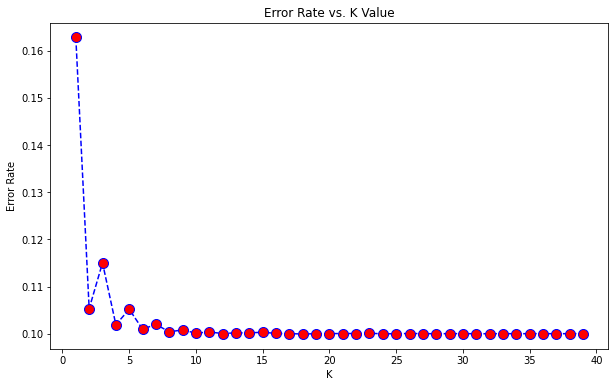

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[52708  1288]
 [ 5615   389]]


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     53996
           1       0.23      0.06      0.10      6004

    accuracy                           0.88     60000
   macro avg       0.57      0.52      0.52     60000
weighted avg       0.84      0.88      0.85     60000



##2.4. Random Forest with variables with IV value >=0.02

In [21]:
features_log_reg = iv_subset1['Variable'] # taking all variables that have IV value >= 0.02

In [22]:
features_log_reg['target'] = "target"

<ipython-input-22-a9a33d310e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_log_reg['target'] = "target"
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


In [23]:
train_2 = pd.DataFrame(train, columns = features_log_reg)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_2.drop('target',axis=1), 
                                                    train_2['target'], test_size=0.30, 
                                                    random_state=101)

In [25]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[53979     1]
 [ 5991    29]]


The default cut-off value of 0.5 is causing very few cases to be classified as 1. 

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.97      0.00      0.01      6020

    accuracy                           0.90     60000
   macro avg       0.93      0.50      0.48     60000
weighted avg       0.91      0.90      0.85     60000



##2.5. Changing the cut-off in Random Forest

In [ ]:
pred_proba_df = pd.DataFrame(rfc.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                   y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))
    print(classification_report(y_test.values.reshape(y_test.values.size,1),
                                y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.411
[[18996 34984]
 [  356  5664]]
              precision    recall  f1-score   support

           0       0.98      0.35      0.52     53980
           1       0.14      0.94      0.24      6020

    accuracy                           0.41     60000
   macro avg       0.56      0.65      0.38     60000
weighted avg       0.90      0.41      0.49     60000


******** For i = 0.1 ******
Our testing accuracy is 0.6407333333333334
[[33498 20482]
 [ 1074  4946]]
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     53980
           1       0.19      0.82      0.31      6020

    accuracy                           0.64     60000
   macro avg       0.58      0.72      0.54     60000
weighted avg       0.89      0.64      0.71     60000


******** For i = 0.15 ******
Our testing accuracy is 0.7861166666666667
[[43123 10857]
 [ 1976  4044]]
              precision    recall  f1-score   su

It is seen that the F1 score increases until cut-off = 0.2 and then decreases. Hence, a cut-off of 0.2 is chosen.

In [ ]:
submission_3 = rfc.predict_proba(pd.DataFrame(test,columns = features_log_reg_test))[:,1]

In [ ]:
submission_3

array([0.18, 0.13, 0.27, ..., 0.03, 0.12, 0.12])

In [ ]:
submission_3 = pd.concat([test['ID_code'], pd.Series(submission_3).rename('target')], axis=1)

In [ ]:
submission_3['target'] = submission_3['target'].apply(lambda x:1 if x>0.2 else 0)

In [ ]:
submission_4 = rfc.predict_proba(pd.DataFrame(test,columns = features_log_reg_test))[:,1]
submission_4 = pd.concat([test['ID_code'], pd.Series(submission_4).rename('target')], axis=1)
submission_3['target'] = submission_3['target'].apply(lambda x:1 if x>0.2 else 0)

##2.6. Random Forest Grid search with variables >= 0.02

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_2.drop('target',axis=1), 
                                                    train_2['target'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
rfc2 = RandomForestClassifier(oob_score=True,random_state=42)

In [ ]:
# skfcv = StratifiedKFold(n_splits = 10)

In [ ]:
param_grid = { 
    'n_estimators' : [100,200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc2, param_grid=param_grid, n_jobs=-1,scoring = f1_score,verbose=3,refit=True) #cv= skfcv
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring=<function f1_score at 0x7f91e9969af0>)

In [ ]:
CV_rfc.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
pred_proba_df = pd.DataFrame(CV_rfc.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                   y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))
    print(classification_report(y_test.values.reshape(y_test.values.size,1),
                                y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.10033333333333333
[[    0 53980]
 [    0  6020]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     53980
           1       0.10      1.00      0.18      6020

    accuracy                           0.10     60000
   macro avg       0.05      0.50      0.09     60000
weighted avg       0.01      0.10      0.02     60000


******** For i = 0.1 ******
Our testing accuracy is 0.6336666666666667
[[33639 20341]
 [ 1639  4381]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     53980
           1       0.18      0.73      0.29      6020

    accuracy                           0.63     60000
   macro avg       0.57      0.68      0.52     60000
weighted avg       0.88      0.63      0.71     60000


******** For i = 0.15 ******
Our testing accuracy is 0.8965333333333333
[[52912  1068]
 [ 5140   880]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     53980
           1       0.45      0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.00      0.00      0.00      6020

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000


******** For i = 0.4 ******
Our testing accuracy is 0.8996666666666666
[[53980     0]
 [ 6020     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.00      0.00      0.00      6020

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000


******** For i = 0.45 ******
Our testing accuracy is 0.8996666666666666
[[53980     0]
 [ 6020     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.00      0

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
submission_4 = CV_rfc.predict_proba(pd.DataFrame(test,columns = features_log_reg[:-1]))[:,1]

In [ ]:
submission_4 = pd.concat([test['ID_code'], pd.Series(submission_4).rename('target')], axis=1)

In [ ]:
submission_4['target'] = submission_4['target'].apply(lambda x:1 if x>0.1 else 0)

In [ ]:
submission_4.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Santander/submission4.csv',index=False)

##2.7. Random Forest with top 65 variables (scaled)

In [ ]:
scaler = StandardScaler()
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_2.drop('target',axis=1), 
                                                    train_2['target'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
pipeline = Pipeline([
    ("Z Scaling", scaler),
    ("Random Forest", rfc)
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Z Scaling', StandardScaler()),
                ('Random Forest', RandomForestClassifier())])

In [ ]:
pred_proba_df = pd.DataFrame(pipeline.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                   y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))
    print(classification_report(y_test.values.reshape(y_test.values.size,1),
                                y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.4121666666666667
[[19053 34927]
 [  343  5677]]
              precision    recall  f1-score   support

           0       0.98      0.35      0.52     53980
           1       0.14      0.94      0.24      6020

    accuracy                           0.41     60000
   macro avg       0.56      0.65      0.38     60000
weighted avg       0.90      0.41      0.49     60000


******** For i = 0.1 ******
Our testing accuracy is 0.64275
[[33613 20367]
 [ 1068  4952]]
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     53980
           1       0.20      0.82      0.32      6020

    accuracy                           0.64     60000
   macro avg       0.58      0.72      0.54     60000
weighted avg       0.89      0.64      0.71     60000


******** For i = 0.15 ******
Our testing accuracy is 0.7867833333333333
[[43146 10834]
 [ 1959  4061]]
              precision    recall  f1-score   

It is observed that the performance did not change after the variable scaling.

##2.8. SVM with variables >=0.02 IV

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.00      0.00      0.00      6020

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,predictions))

[[53980     0]
 [ 6020     0]]


##2.9. SVM with scaled variables with IV>=0.02

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(X_train)

In [ ]:
model = SVC()

In [ ]:
model.fit(scaled_data,y_train)

SVC()

In [ ]:
scaled_test = scaler.transform(X_test)

In [ ]:
predictions = model.predict(scaled_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     53980
           1       0.77      0.10      0.18      6020

    accuracy                           0.91     60000
   macro avg       0.84      0.55      0.57     60000
weighted avg       0.89      0.91      0.87     60000



In [ ]:
print(confusion_matrix(y_test,predictions))

[[53791   189]
 [ 5394   626]]
